In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.io import loadmat
import os
%matplotlib inline

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams["mathtext.fontset"] = "cm"

# LED

In [2]:
Fc_list = [2,4,7,10, np.inf]
os.chdir('..')
data_folder = os.getcwd()+"\\Experimental_Data_Example\\LED_Data\\"  # Note that use absolute path on your computer instead.
file_list = ['20200408_OU_cutoff=2_sort_unit2',
             '20200408_OU_cutoff=4_sort_unit2',
             '20200408_OU_cutoff=7_sort_unit2',
             '20200408_OU_cutoff=10_sort_unit2',
             '20200408_OU_original_tau=0p5_sort_unit2']

dt = 0.01
pcn = 53
ncn = 41

In [3]:
x_list = []
T_list = []
prstate_list = []
nrstate_list = []

for file in file_list:
    file = data_folder+file
    annots = loadmat(file, squeeze_me = True)
    sampling_rate = 20000
    TimeStamps = annots['TimeStamps']
    x = annots['a_data'][0, int(TimeStamps[0]*sampling_rate):int(TimeStamps[1]*sampling_rate)+1]
    x = ndimage.gaussian_filter1d(x, sigma=int(sampling_rate*dt/2), mode='reflect') / dt
    x = x[::int(sampling_rate*dt)]
    x = x.astype(float)
    x = (x -np.mean(x))/np.std(x)
    T=np.arange(len(x))*dt+dt
    prstate,_ = np.histogram(annots['Spikes'][pcn-1]-TimeStamps[0], np.append(0,T))
    nrstate,_ = np.histogram(annots['Spikes'][ncn-1]-TimeStamps[0], np.append(0,T))
    prstate_list.append( prstate.copy() )
    nrstate_list.append( nrstate.copy() )
    x_list.append( x.copy() )
    T_list.append( T.copy() )

In [4]:
nXcorr_list = []
pXcorr_list = []

window = [-1,1] # second
timeaxis = np.arange(-100,101)*dt
for i in range(len(x_list)):
    pXcorr = np.correlate(x_list[i], prstate_list[i], 'same')/ np.correlate(np.ones_like(x_list[i]), prstate_list[i], 'same')
    pXcorr = pXcorr[int(len(pXcorr)/2)-100 : int(len(pXcorr)/2)+101]
    
    nXcorr = np.correlate(x_list[i], nrstate_list[i], 'same')/ np.correlate(np.ones_like(x_list[i]), nrstate_list[i], 'same')
    nXcorr = nXcorr[int(len(nXcorr)/2)-100 : int(len(nXcorr)/2)+101]
    
    nXcorr_list.append( nXcorr.copy() )
    pXcorr_list.append( pXcorr.copy() )

# Figure 3.11: Typical STA χ(γ, s; δt) of the iP-RGC and iN-RGC.

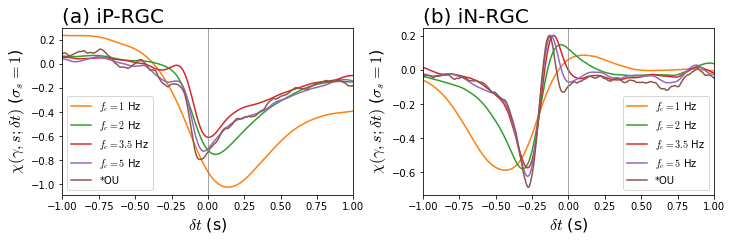

In [5]:
plt.rcParams["font.size"] = 10

fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2, constrained_layout=True)
for i in range(len(x_list)):
    ax2.plot(timeaxis, pXcorr_list[i], c = plt.cm.tab10(i+1))
    ax3.plot(timeaxis, nXcorr_list[i], c = plt.cm.tab10(i+1))
    ax2.set_title('(a) iP-RGC', fontsize = 20, loc='left')
    ax3.set_title('(b) iN-RGC', fontsize = 20, loc='left')
    
for ax in (ax2, ax3):
    ax.axvline(0, c = 'gray', linewidth = 1, alpha = 0.7)
    ax.set_xlabel(r'$\delta t$ (s)', fontsize = 16)
    ax.set_ylabel(r'$\chi(\gamma, s; \delta t)$ ($\sigma_s=1$)', fontsize = 16)
    ax.legend( (r'$f_c=1$ Hz', r'$f_c=2$ Hz', r'$f_c=3.5$ Hz', r'$f_c=5$ Hz', r'*OU'),  fontsize = 10 )
    ax.set_xlim(window)
fig.set_size_inches(10, 3.2)